# Exercise 5 Solution
> by GONG ZERUI, 2022.02.25

----

### Preparations


Importing NumPy, Pandas, Matplotlib, and Seaborn.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
sb.set()

Importing the training dataset in Jupyter Notebook

In [8]:
trainData = pd.read_csv('train.csv')
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


----------------

### Problem 1 : Predicting CentralAir using SalePrice

##### a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit two Classification Tree models (of max depth 2 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.


First let's plot the Swarmplot for SalePrice and CentralAir just to have a general idea of these two variables.

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

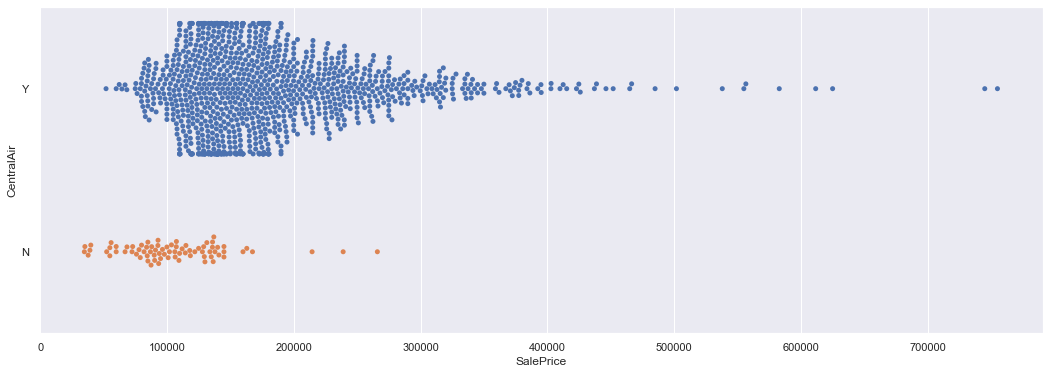

In [9]:
# extract relevant dataframes
SalePrice = pd.DataFrame(trainData['SalePrice'])
CentralAir = pd.DataFrame(trainData['CentralAir'])

# split the CentralAir-SalePrice dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(SalePrice, CentralAir, test_size = 0.2)

# Create a joint dataframe by concatenating SalePrice and CentralAir
trainDF = pd.concat([x_train, y_train], axis = 1).reindex(x_train.index)

# Joint Swarmplot of SalePrice Train against CentralAir Train
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")


[Text(0.44, 0.9, 'SalePrice <= 98150.0\ngini = 0.123\nsamples = 1168\nvalue = [77, 1091]\nclass = Y'),
 Text(0.2, 0.7, 'SalePrice <= 61191.5\ngini = 0.486\nsamples = 89\nvalue = [37, 52]\nclass = Y'),
 Text(0.08, 0.5, 'SalePrice <= 46000.0\ngini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = N'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = N'),
 Text(0.12, 0.3, 'SalePrice <= 52250.0\ngini = 0.375\nsamples = 8\nvalue = [6, 2]\nclass = N'),
 Text(0.08, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(0.16, 0.1, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = N'),
 Text(0.32, 0.5, 'SalePrice <= 97750.0\ngini = 0.45\nsamples = 76\nvalue = [26, 50]\nclass = Y'),
 Text(0.28, 0.3, 'SalePrice <= 96750.0\ngini = 0.444\nsamples = 75\nvalue = [25, 50]\nclass = Y'),
 Text(0.24, 0.1, 'gini = 0.453\nsamples = 72\nvalue = [25, 47]\nclass = Y'),
 Text(0.32, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Y'),
 Text(0.36, 0.3, 'gini = 0.0\nsamples = 1\

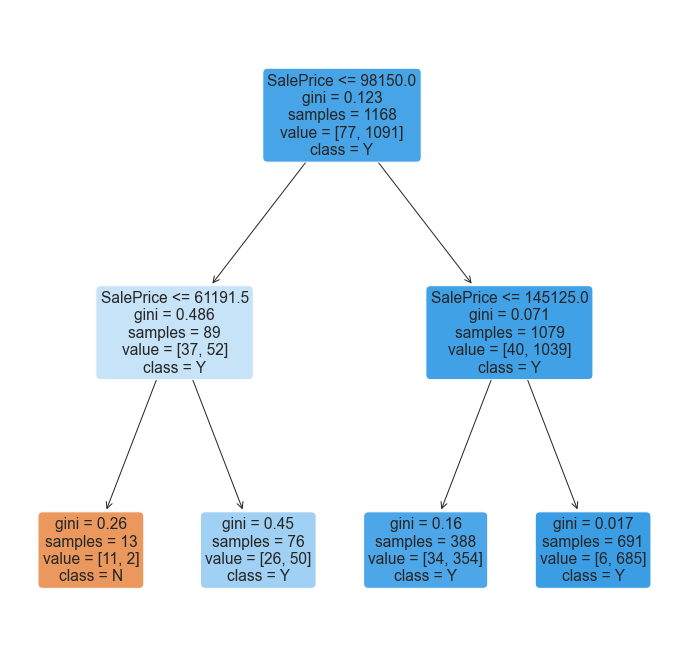

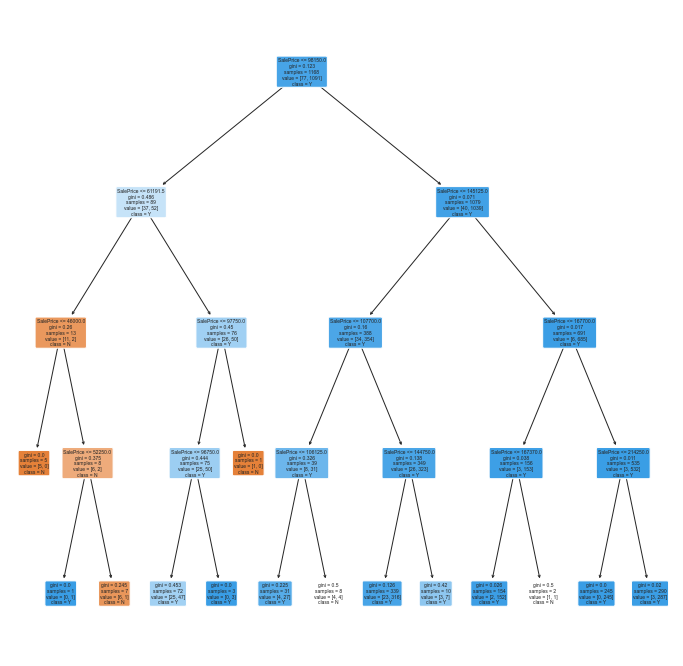

In [10]:

#decision tree using train data
tree1 = DecisionTreeClassifier(max_depth= 2)    #* tree1 : max depth 2
tree1.fit(x_train, y_train)

f = plt.figure(figsize=(12,12))
plot_tree(tree1, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])


tree2 = DecisionTreeClassifier(max_depth= 4)    #* tree1 : max depth 4
tree2.fit(x_train, y_train)

f = plt.figure(figsize=(12,12))
plot_tree(tree2, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])

##### b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both the trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better?

<AxesSubplot:>

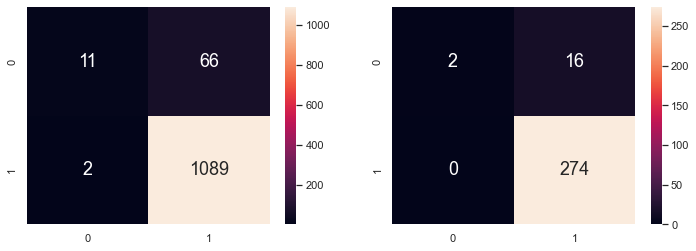

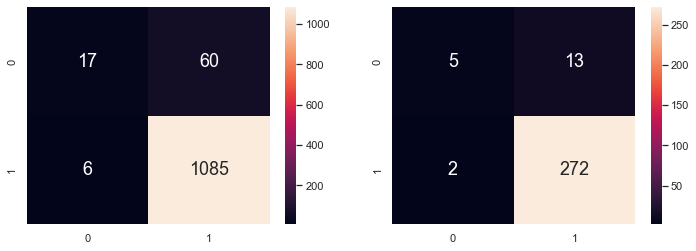

In [13]:
# model of max_depth 2
# Predict CentralAir values corresponding to SalePrice
y_train_pred1 = tree1.predict(x_train)
y_test_pred1 = tree1.predict(x_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# model of max_depth 2
# Predict CentralAir values corresponding to SalePrice
y_train_pred2 = tree2.predict(x_train)
y_test_pred2 = tree2.predict(x_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred2),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred2),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



To calculate the metrics, I wrote a helper function.

In [14]:
# function to print TN, FN, TP, FP for a binary classification
def binary_metric(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR


[TPR1_train, FPR1_train] = binary_metric(y_train, y_train_pred1)
[TPR1_test, FPR1_test] = binary_metric(y_test, y_test_pred1)
[TPR2_train, FPR2_train] = binary_metric(y_train, y_train_pred2)
[TPR2_test, FPR2_test] = binary_metric(y_test, y_test_pred2)


In [15]:
# Classification Accuracy, True Positive Rate, False Positive Rate #TPR = TP/TP+FN, FPR = FP/FP+TN
# Model1 (max_depth 2)
print('For Model 1 (max_depth 2)')
print("Classification Accuracy in train data \t:",tree1.score(x_train, y_train))
print("Classification Accuracy in test data \t:",tree1.score(x_test, y_test))
print("TPR for train\t:", 0.9981684981684982)
print("FPR for train\t:", 0.868421052631579)

print("TPR for test\t:", 0.9963369963369964)
print("FPR for test\t:", 0.8421052631578947)

print()

# Model2 (max_depth 4)
print('For Model 2 (max_depth 4)')
print("Classification Accuracy in train data \t:",tree2.score(x_train, y_train))
print("Classification Accuracy in test data \t:",tree2.score(x_test, y_test))
print("TPR for train\t:", [TPR1_train, FPR1_train][0])
print("FPR for train\t:", [TPR1_train, FPR1_train][1])

print("TPR for test\t:", [TPR2_test, FPR2_test][0])
print("FPR for test\t:", [TPR2_test, FPR2_test][1])

For Model 1 (max_depth 2)
Classification Accuracy in train data 	: 0.9417808219178082
Classification Accuracy in test data 	: 0.9452054794520548
TPR for train	: 0.9981684981684982
FPR for train	: 0.868421052631579
TPR for test	: 0.9963369963369964
FPR for test	: 0.8421052631578947

For Model 2 (max_depth 4)
Classification Accuracy in train data 	: 0.9434931506849316
Classification Accuracy in test data 	: 0.9486301369863014
TPR for train	: 0.998166819431714
FPR for train	: 0.8571428571428571
TPR for test	: 0.9927007299270073
FPR for test	: 0.7222222222222222


The conclusion is that the two models perform similarly on the train set. Thus, the comparison between these two models in terms of their performance on test set matters more. We can see that the first model has better TPR and FPR for the test dataset. So the conclusion is that the first model is better.

---

### Problem 2 : Predicting CentralAir using Other Variables
##### Following the steps from the previous problem, build two new uni-variate Classification Tree models (of max depth 4) to predict CentralAir using the variables OverallQual and YearBuilt. Justify which of the variables is the best predictor.

In [16]:
OverallQual = pd.DataFrame(trainData['OverallQual'])
YearBuilt = pd.DataFrame(trainData['YearBuilt'])

To proceed, I wrote a helper function to do classification on variables in a given dataset

In [19]:
def classification(predict, response):
    # split the dataset into train and test
    x_train, x_test, y_train, y_test = train_test_split(predict, response, test_size=0.20)
    # decision tree using train data
    decisionTree = DecisionTreeClassifier(max_depth=4)
    decisionTree.fit(x_train, y_train)
    # predict response corresponding to predictors
    y_train_pred = decisionTree.predict(x_train)
    y_test_pred = decisionTree.predict(x_test)
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", decisionTree.score(x_train, y_train))
    print()
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", decisionTree.score(x_test, y_test))
    print()
    # Plot the Confusion Matrix for Train and Test (uncomment to print out)
    """
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(
        confusion_matrix(y_train, y_train_pred),
        annot=True,
        fmt=".0f",
        annot_kws={"size": 18},
        ax=axes[0],
    )
    sb.heatmap(
        confusion_matrix(y_test, y_test_pred),
        annot=True,
        fmt=".0f",
        annot_kws={"size": 18},
        ax=axes[1],
    )
    """
    # print classification metric
    [TPR_train, FPR_train] = binary_metric(y_train, y_train_pred)
    [TPR_test, FPR_test] = binary_metric(y_test, y_test_pred)
    print("TPR for train\t:", [TPR_train, FPR_train][0])
    print("FPR for train\t:", [TPR_train, FPR_train][1])
    print("TPR for test\t:", [TPR_test, FPR_test][0])
    print("FPR for test\t:", [TPR_test, FPR_test][1])

print("Model Metric for OverallQual Vs. CentralAir")
classification(OverallQual, CentralAir)
print("------------------------------------------------------")
print("Model Metric for YearBuilt Vs. CentralAir")
classification(YearBuilt, CentralAir)


Model Metric for OverallQual Vs. CentralAir
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9417808219178082

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9315068493150684

TPR for train	: 0.9936131386861314
FPR for train	: 0.8472222222222222
TPR for test	: 0.9925650557620818
FPR for test	: 0.782608695652174
------------------------------------------------------
Model Metric for YearBuilt Vs. CentralAir
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9366438356164384

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9383561643835616

TPR for train	: 0.9963302752293578
FPR for train	: 0.8974358974358975
TPR for test	: 0.9927272727272727
FPR for test	: 0.9411764705882353


The two models have similar Classification Accuracy as the above suggests. Also, the TPR and FPR for train datasets are quite close as well. So the comparison of how the two models perform on the test dataset matters more here. We can see that the YearBuilt model has better TPR and FPR for test datasets. So we conclude that the YearBuilt Model performs better.

---
### Problem 3 : Understanding the Misclassified Samples
##### (a) Print the Classification Tree of max depth 4 that you fit in Problem 1(a). Note that each leaf node of your tree represents a specific partition of your training data, based on certain conditions given by the splits in the tree. Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.

[Text(0.44, 0.9, 'SalePrice <= 98150.0\ngini = 0.123\nsamples = 1168\nvalue = [77, 1091]\nclass = Y'),
 Text(0.2, 0.7, 'SalePrice <= 61191.5\ngini = 0.486\nsamples = 89\nvalue = [37, 52]\nclass = Y'),
 Text(0.08, 0.5, 'SalePrice <= 46000.0\ngini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = N'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = N'),
 Text(0.12, 0.3, 'SalePrice <= 52250.0\ngini = 0.375\nsamples = 8\nvalue = [6, 2]\nclass = N'),
 Text(0.08, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(0.16, 0.1, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = N'),
 Text(0.32, 0.5, 'SalePrice <= 97750.0\ngini = 0.45\nsamples = 76\nvalue = [26, 50]\nclass = Y'),
 Text(0.28, 0.3, 'SalePrice <= 96750.0\ngini = 0.444\nsamples = 75\nvalue = [25, 50]\nclass = Y'),
 Text(0.24, 0.1, 'gini = 0.453\nsamples = 72\nvalue = [25, 47]\nclass = Y'),
 Text(0.32, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Y'),
 Text(0.36, 0.3, 'gini = 0.0\nsamples = 1\

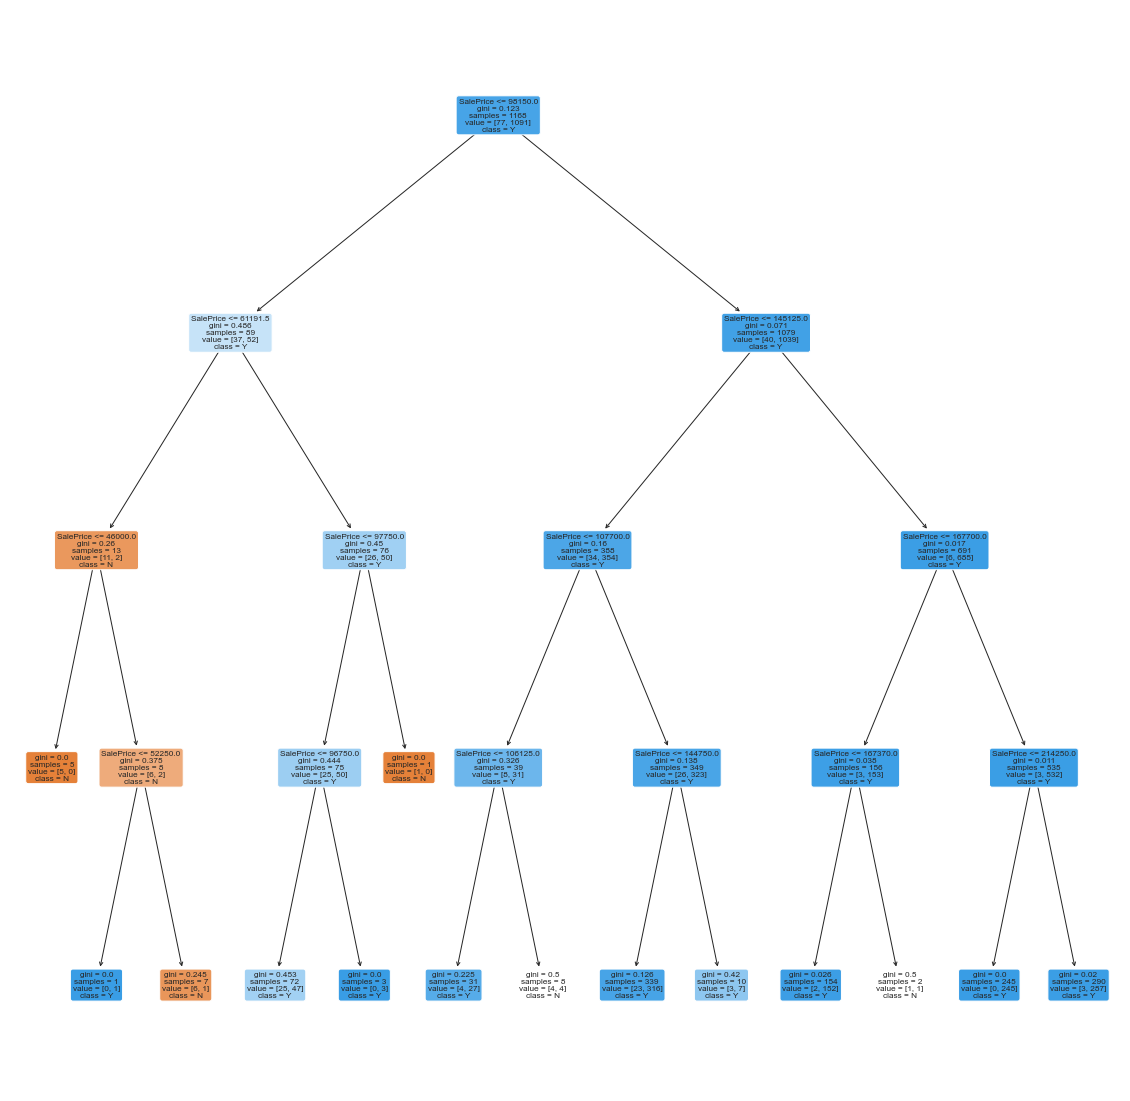

In [27]:
# extract relevant dataframes
SalePrice = pd.DataFrame(trainData['SalePrice'])
CentralAir = pd.DataFrame(trainData['CentralAir'])

# split the CentralAir-SalePrice dataset into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(SalePrice, CentralAir, test_size = 0.2)

tree = DecisionTreeClassifier(max_depth= 4)    #* tree1 : max depth 4
tree.fit(X_train, Y_train)

f = plt.figure(figsize=(20,20))
plot_tree(tree2, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])

FP is false predicted as true, according to the diagram, from left to right, Leaf 8 has the highest number of FPs in the training data set, its condition is SalePrice >= 107700.0 and SalePrice <=144750.0

In [30]:
# Create a joint dataframe by concatenating SalePrice and CentralAir
jointDF = pd.concat([X_train, Y_train], axis = 1).reindex(X_train.index)

leaf8 = jointDF[(jointDF['SalePrice']>107700) & (jointDF['SalePrice']<=144750)]
leaf8

,SalePrice,CentralAir
669,137500,Y
569,135960,Y
897,142953,Y
908,131000,Y
1119,133700,Y
...,...,...
814,116000,Y
1266,122000,N
1150,124000,Y
246,137000,N


##### b) Print ONLY the False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a). 


In [31]:
leaf8_false = leaf8[(leaf8['CentralAir'] != 'Y')]
leaf8_false

,SalePrice,CentralAir
108,115000,N
579,131500,N
1443,121000,N
985,125000,N
1349,122000,N
78,136500,N
883,118500,N
1248,129500,N
291,135900,N
843,141000,N
